In [159]:
import tensorflow as tf
# print(tf.__version__)

from keras.models import Sequential
from keras import layers
from keras.layers import Dense, Dropout, Activation,  Flatten
from keras.optimizers import Adam
from keras import metrics, losses
# #NN Architecture 

model = Sequential([layers.Dense(100, activation='relu'),
                    #layers.Dropout(0.3),
                    layers.Dense(100, activation="relu"), 
                    #layers.Dropout(0.3),
                    layers.Dense(2, activation="softmax")
                        ])
#print("Gone past")
model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'], optimizer='Adam')


In [160]:
#read hte dataset
import numpy as np 
import pandas as pd

dataset = '/Users/ns/development/iisc/WLDS2/data/out/dataset_1.csv'

dataset_df = pd.read_csv(dataset)
dataset_df.head()
#normalised = False

#***


,Sample#,spectral_centroid,spectral_bandwidth,spectral_rolloff,onset_strength,mfcc,zero_crossing_rate,percussion,label
0,0,2511.386250,2729.875912,5842.984906,1.045006,-9.416307,0.111454,0.000439,running water/noise
1,1,4404.511193,2927.396323,8127.717219,1.153729,-6.239438,0.332613,0.001991,running water/noise
2,2,1493.985935,2298.555600,3552.204076,0.964541,-7.512391,0.034406,0.000318,running water/noise
3,3,6176.509396,2558.997845,9052.090669,1.014228,-9.270225,0.586167,0.004790,running water/noise
4,4,3261.177446,2767.363092,6846.577785,1.043973,-12.088974,0.200988,0.001987,running water/noise


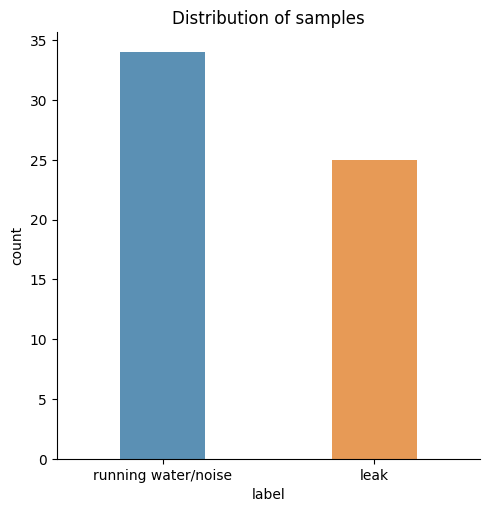

In [161]:

#Frequency distribution of  data
import matplotlib.pyplot as plt 
import seaborn as sns

sns.catplot(x='label', data=dataset_df, kind='count', width=0.4, alpha=0.8)
# set the title
plt.title('Distribution of samples')
# show the plot
plt.show()

####


In [162]:
#normalize feature data - should we use it? 
#ncluded in the main
# from sklearn import preprocessing

# normalised = True
# if normalised:
#     ind_columns = ['spectral_centroid', 'spectral_bandwidth',
#                 'spectral_rolloff', 'onset_strength',
#                 'mfcc', 'zero_crossing_rate', 'percussion']
#     feature_arr = np.array(dataset_df[ind_columns])
#     norm_feat_arr = preprocessing.normalize(feature_arr)
#     print(norm_feat_arr)



In [163]:
#convert the data to appropriate axes, use either normalised or un-normalised data
from sklearn import preprocessing
from keras.utils import to_categorical 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
normalised = True
ind_columns = ['spectral_centroid', 'spectral_bandwidth',
               'spectral_rolloff', 'onset_strength',
               'mfcc', 'zero_crossing_rate', 'percussion']

y = np.array(dataset_df['label']).tolist()
#print(y)
le = LabelEncoder()
#- labels into class
y = to_categorical(le.fit_transform(y))

if normalised:
    #for normalised
    feature_arr = np.array(dataset_df[ind_columns])
    X = preprocessing.normalize(feature_arr)
    #print(X)
    
    out_file_path = '/Users/ns/development/iisc/WLDS2/normal_out/'
else:
    #for un_normalised
    X = np.array(dataset_df[ind_columns])
    out_file_path = '/Users/ns/development/iisc/WLDS2/un_normal_out/'



In [164]:
#Result analysis - this function is called later from the main cells
#plots train and test accuracy on one plot and train and test loss on another
#parameters are test split, epochs, history, train and test scores 
def plot_data(split, e, his, train_score, test_score):
    
    X = np.linspace(0, e, e)
    partial = int(e*.75)
    XModelState = np.linspace(partial, e, e-partial)
    # Assign variables to the y axis part of the curve
    y = his.history['accuracy']
    z = his.history['val_accuracy']

    figure, (acc, los) = plt.subplots(1, 2, figsize=(8, 4))
   
    test_acc_odel_state  = 'model state acc {acc}'.format(acc=round(test_score[1],4))
    
    # Plotting both the curves simultaneously
    acc.plot(X, y, color='y',   label='train', linewidth=2, linestyle=':' )
    acc.plot(X, z, color='b',  label='val', linewidth=2, linestyle='-.')
    acc.plot(XModelState, [test_score[1]]*(e-partial), color='magenta',
             label='val-model state', linewidth=1)
    # acc.text(XModelState[0]+1, test_score[1]+0.03, test_acc_odel_state,
    #          fontdict={'size': 8, 'family': 'Arial', 'weight': 'light'})
    acc.annotate(test_acc_odel_state, xy=(e, test_score[1]),xytext=(int(e*.6), 0.9), 
                 font={'size': 8, 'family': 'Arial', 'weight': 'light'}, color='m',
                    arrowprops=dict(facecolor='green', shrink=0.05))
    acc.set_title("Accuracy")
  
    los.plot(X, his.history['loss'], color='y',
             label='train', linewidth=2, linestyle=':')
    los.plot(X, his.history['val_loss'], color='b',
             label='val', linewidth=2, linestyle='-.')
    los.plot(XModelState, [test_score[0]]*(e-partial), color='m',
             label='val-model state', linewidth=1)
    # test_los_odel_state = 'model state {los}'.format(los=round(test_score[0],4))
    # los.text(XModelState+1, test_score[1]+0.05, test_los_odel_state,
    #          fontdict={'size': 8, 'family': 'Arial', 'weight': 'light'})
    los.set_title("Loss")
    
    if normalised:
        acc.set_yticks(np.linspace(0, 1, 10))
        los.set_yticks(np.linspace(0, 1.4, 14))
    plt.legend(bbox_to_anchor=(1, 1), loc="upper left", fontsize=10)  
    figure.suptitle('Test split = {split}, #Epochs = {e}'.format(
        split=split, e=e), fontsize=20, fontweight='bold')
    figure.subplots_adjust(top=.8)
    #print('plot_{split}_{e}.png'.format(split=split, e=e))

    plt.savefig(out_file_path + 'plot_{split}_{e}.png'.format(
       split=split, e=e), bbox_inches='tight')

    plt.show()
   
    return


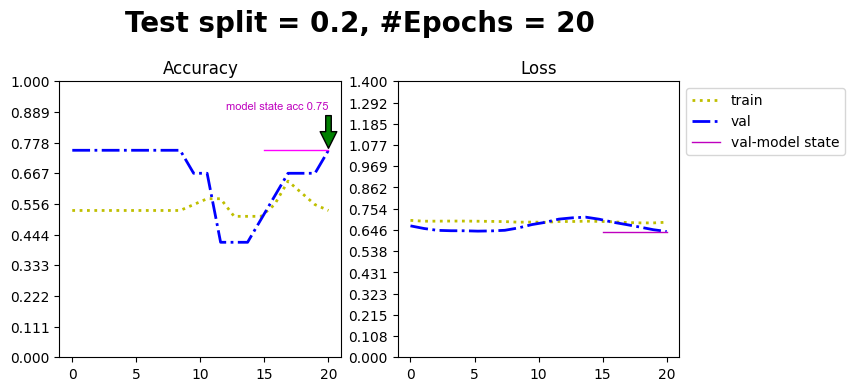

1/1 [==============================] - 0s 167ms/step


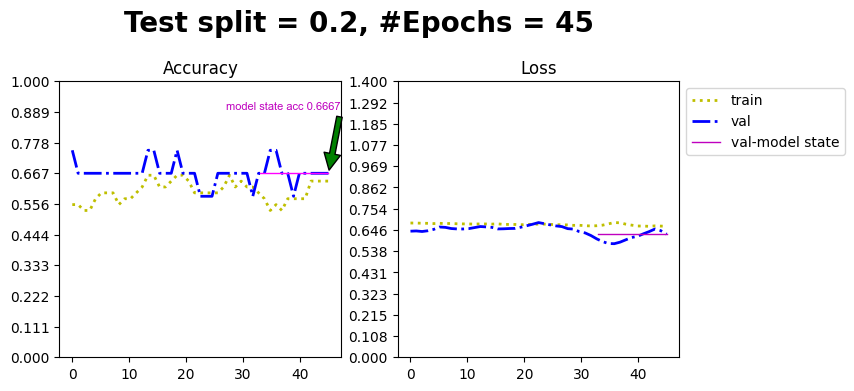

1/1 [==============================] - 0s 41ms/step


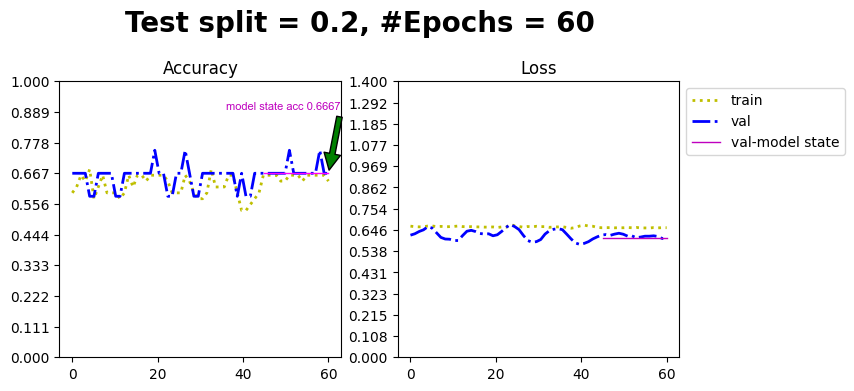

1/1 [==============================] - 0s 64ms/step


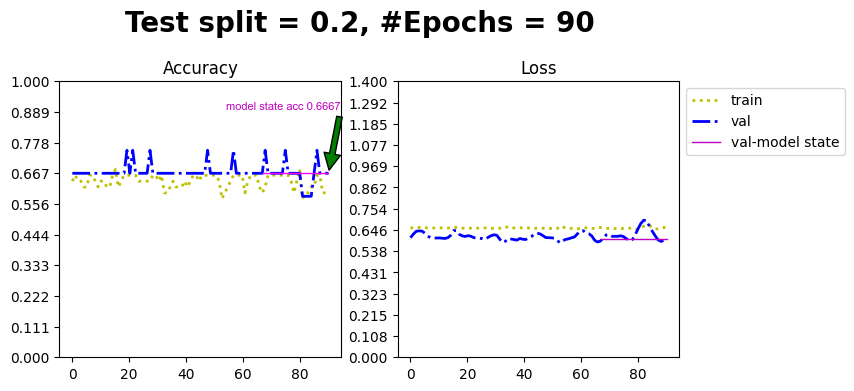

1/1 [==============================] - 0s 37ms/step


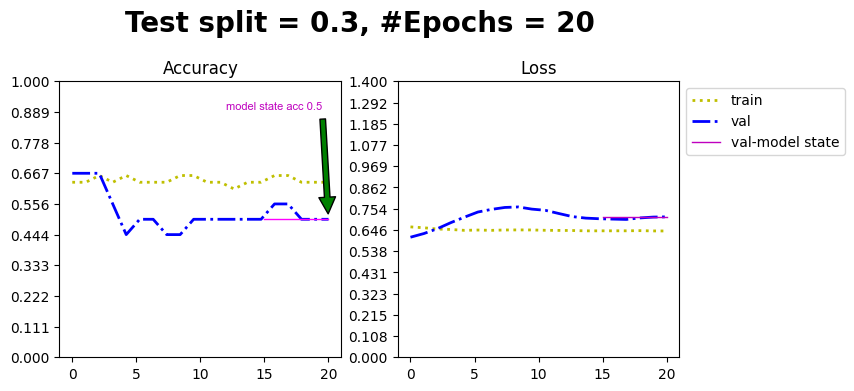

1/1 [==============================] - 0s 54ms/step


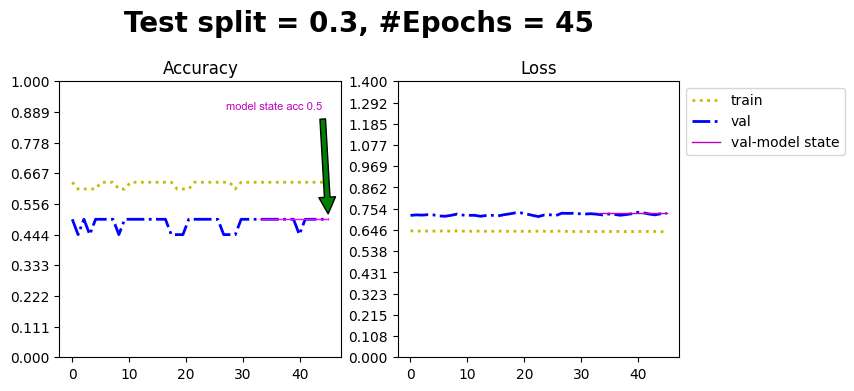

1/1 [==============================] - 0s 31ms/step


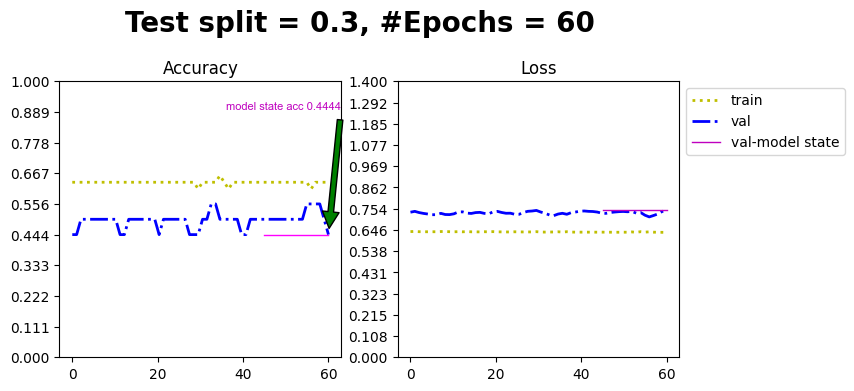

1/1 [==============================] - 0s 40ms/step


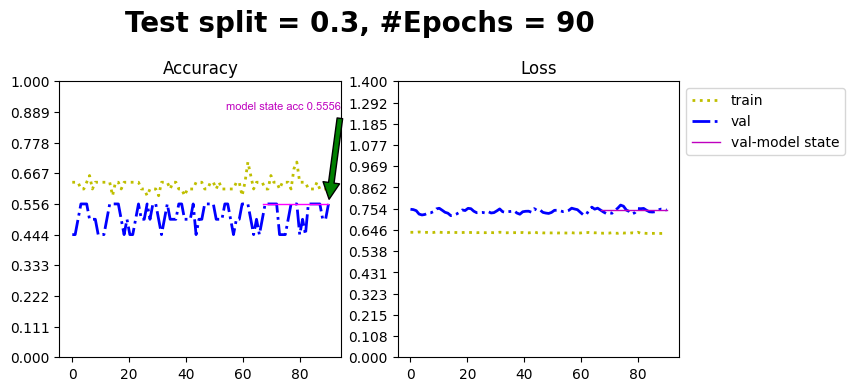

1/1 [==============================] - 0s 33ms/step


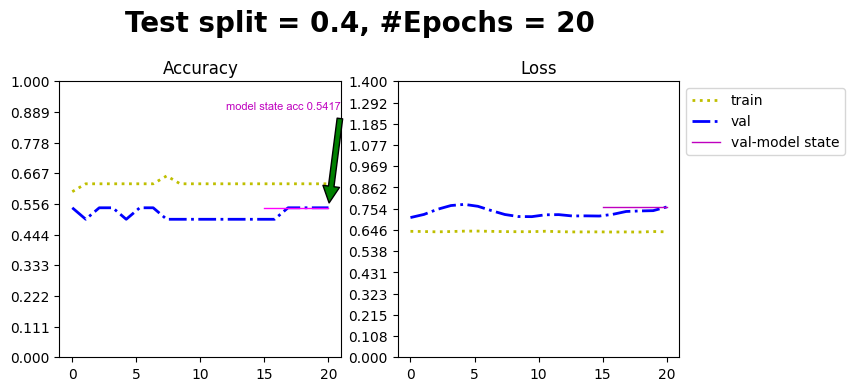

1/1 [==============================] - 0s 173ms/step


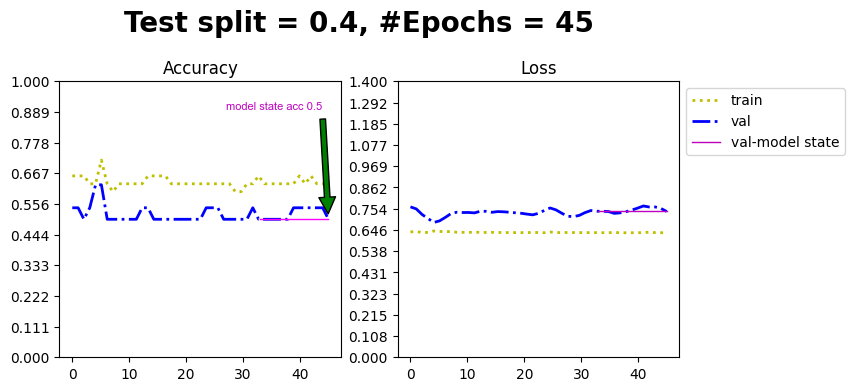

1/1 [==============================] - 0s 45ms/step


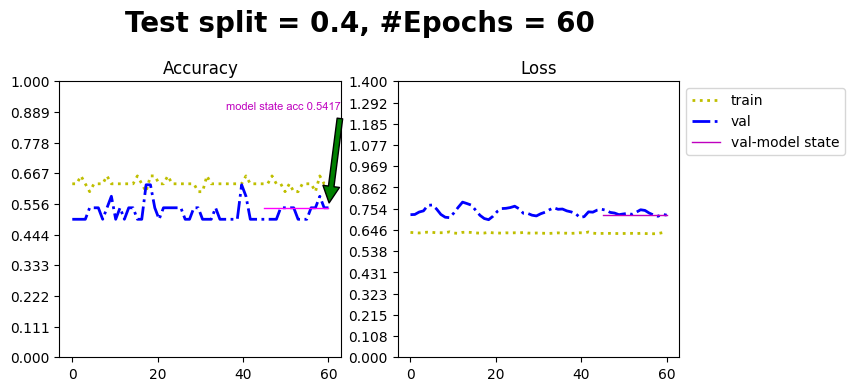

1/1 [==============================] - 0s 46ms/step


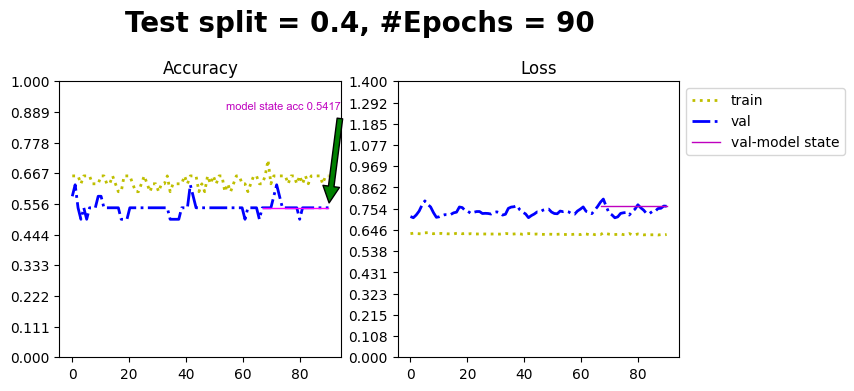

1/1 [==============================] - 0s 47ms/step


In [165]:
### main cell 
# for different split proprtions and different epochs, fir the model
# evaluate, plot and save the results
import warnings
warnings.filterwarnings('ignore')
#Split data & Train the model

split_set = [.2, .3, .4]
num_epochs = [20, 30, 40, 50, 60, 70, 80, 90, 100]
num_batch_size = 21

#for testing
# split_set = [.2]
# num_epochs = [10]


#train the model
saved_results = []
saved_metrics = []
for test_set in split_set:
    X_train, X_test, y_train,  y_test = train_test_split(
        X, y, test_size=test_set, random_state=42)
  #  print(X_train.shape, X_test.shape)

    for tr_epoch in num_epochs:
        #print(X_test.shape, y_test.shape)
        # print(X_train.dtype, y_train.dtype)
        history = model.fit(X_train, y_train, batch_size=num_batch_size, epochs=tr_epoch,
            verbose=0, validation_data=(X_test, y_test))
        
        train_score = model.evaluate(X_train, y_train, verbose=0)
        test_score = model.evaluate(X_test, y_test, verbose=0)
    
        plot_data(test_set, tr_epoch, history, train_score, test_score)

        #prediction
        pred = model.predict(X_test)
        pred = np.argmax(pred, axis=1)
        label = np.argmax(y_test, axis=1)
        # print("Pred", pred)
        # print("label", label )
        saved_results.append(
            [test_set, X_train.shape[0], X_test.shape[0], tr_epoch,
             history.history['loss'], history.history['accuracy'],
             history.history['val_loss'], history.history['val_accuracy']])
        saved_metrics.append([test_set, tr_epoch, pred, label, test_score])
        #print("(%f, %s) predicted: %s, actual: %s", (test_set, tr_epoch, pred, label))
        
 #training done, resutlts plotted and saved




In [166]:
#print("Convert to df and save")

saved_columns = ['test split', 'train samples', 'test samples','epochs', 
        'train_loss', 'train_accuracy', 'val_loss', 'val_accuracy']

# all data used for the plots to be saved to plots_1.csv
results_df = pd.DataFrame(saved_results, columns=saved_columns)
results_df

#out_file_path = '/Users/ns/development/iisc/WLDS2/normal_out/'
results_df.to_csv(out_file_path + 'plots_1.csv', index=False)

#metrics and prediction to be saved in metrics_1.csv
metrics_cols = ['test_set', 'tr_epoch', 'pred', 'label', 'test_score']
metrics_df = pd.DataFrame(saved_metrics, columns=metrics_cols)
metrics_df.to_csv(out_file_path + 'metrics_1.csv', index=False)
metrics_df

####End of training. result and metrics file is saved. 


,test_set,tr_epoch,pred,label,test_score
0,0.2,20,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1]","[0.6378732323646545, 0.75]"
1,0.2,45,"[1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1]","[1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1]","[0.6246228218078613, 0.6666666865348816]"
2,0.2,60,"[1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1]","[1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1]","[0.6045535206794739, 0.6666666865348816]"
3,0.2,90,"[1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1]","[1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1]","[0.6010141968727112, 0.6666666865348816]"
4,0.3,20,"[0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, ...","[1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, ...","[0.712277889251709, 0.5]"
5,0.3,45,"[0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, ...","[1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, ...","[0.7304032444953918, 0.5]"
6,0.3,60,"[0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, ...","[1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, ...","[0.7477331161499023, 0.4444444477558136]"
7,0.3,90,"[0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, ...","[1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, ...","[0.7464063167572021, 0.5555555820465088]"
8,0.4,20,"[0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, ...","[1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, ...","[0.7624416947364807, 0.5416666865348816]"
9,0.4,45,"[0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, ...","[1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, ...","[0.7396267056465149, 0.5]"
